Projeto de Inteligência Artifical voltado para o Reconhecimento da Datilologia

Grupo: Alina Tainá Germano Costa, Júlia de Oliveira Tavares, Lucas Emanuel Camilo Bezerra e Pedro Henrique Correia Bezerra Silva


A FAZER:
- CRIAR GRÁFICOS: MUITO IMPORTANTE PARA ENTENDER OS RESULTADOS DOS MODELOS
- DIVIDIR A PARTE DE VALIDAÇÃO
- USAR A BIBLIOTECA GRIDSEARCHCV
- RESPONDER O RELATÓRIO COM BASE NOS RESULTADOS OBTIDOS 
- APRESENTAR COM FUNDAMENTO SOBRE O PORQUÊ DAS NOSSAS ESCOLHAS

POSSIBILIDADE: 
- ALGORITMOS DE OTIMIZAÇÃO JUNTO DO GRIDSEARCHCV
- IDENTIFICAR O SINAL PELA WEBCAM AO VIVO

In [ ]:
# import de algumas bibliotecas essenciais: PIL, Image - faz o processo de conversão da imagem; Numpy - fundamental para a manipulação de dados; 
# Matplotlib.pyplot - essencial para a plotagem de gráficos; os - necessária para acessar as imagens dentro do diretório "datilologia"
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
# Carregar os dados preparados
x_treino = np.load('x_treino.npy')  # Carrega as imagens de treinamento
y_treino = np.load('y_treino.npy')  # Carrega os rótulos de treinamento

x_validacao = np.load('x_validacao.npy')  # Carrega as imagens de validação
y_validacao = np.load('y_validacao.npy')  # Carrega os rótulos de validação

x_teste = np.load('x_teste.npy')  # Carrega as imagens de teste
y_teste = np.load('y_teste.npy')  # Carrega os rótulos de teste

In [ ]:
# Achata as imagens para usar no modelo
x_treino = [imagem_treino.flatten() for imagem_treino in x_treino]
x_validacao = [imagem_val.flatten() for imagem_val in x_validacao]
x_teste = [imagem_teste.flatten() for imagem_teste in x_teste]

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
# Inicializar e treinar o modelo
modelo_arvore = DecisionTreeClassifier()
modelo_arvore.fit(x_treino, y_treino)

DecisionTreeClassifier()

In [ ]:
# Avaliar o modelo
previsoes_validacao = modelo_arvore.predict(x_validacao)
acuracia_validacao = accuracy_score(y_validacao, previsoes_validacao)
print(f"Previsões: {previsoes_validacao}")
print(f"Acurácia do modelo: {acuracia_validacao}")

Previsões: ['O' 'E' 'Q' ... 'I' 'O' 'M']
Acurácia do modelo: 0.947861155120265


In [ ]:
# Avaliar o modelo
previsoes_teste = modelo_arvore.predict(x_teste)
acuracia_teste = accuracy_score(y_teste, previsoes_teste)
print(f"Previsões: {previsoes_teste}")
print(f"Acurácia do modelo: {acuracia_teste}")

Previsões: ['A' 'A' 'E' ... 'Y' 'P' 'Y']
Acurácia do modelo: 0.7375303082784898


Matriz de confusão:
 [[396   7   9  10  23   8  39  52   5   0   0   6   1   0   5   6   1   0
    1   1   9]
 [  1 491   0   4   4   2   0   2   0   0   0   4   0   0  14  12  13  10
    4   1   0]
 [  0   0 495   1   3  32   1   3   0   9   0  14  22   0   1   0   0   0
    1   1   0]
 [  0   5   4 402   7  22  11  49   2   0   0   3   4   0  16   1   0   2
   12   1   9]
 [ 22  22   2  30 394  18   4   9   0   0   0   3   0   0   9  12   1   0
   30  15   3]
 [  6  13   0   8   1 332   4   1   0   0   3  11   0   0   1   3  34   1
   23   4   5]
 [  0  11   0 107  17   5 310   7   9   0   0   5   3   0  28  11   0  16
    0  19   2]
 [  0  18   0  11   5   9   7 406   7   0   0   1   0   0   5  26   1   0
    8   4  42]
 [  0   0   1  10   0   2  26   0 492   0   0   5   2   0   1   0   0   3
    4   3   1]
 [  0   0   0   0   0   0   0   0   0 341 137   0  67   5   0   0   0   0
    0   0   0]
 [  3   7   1   0   0   0   0   0   0 141 333   0   7  58   0   0   0   0
    0   0   0]


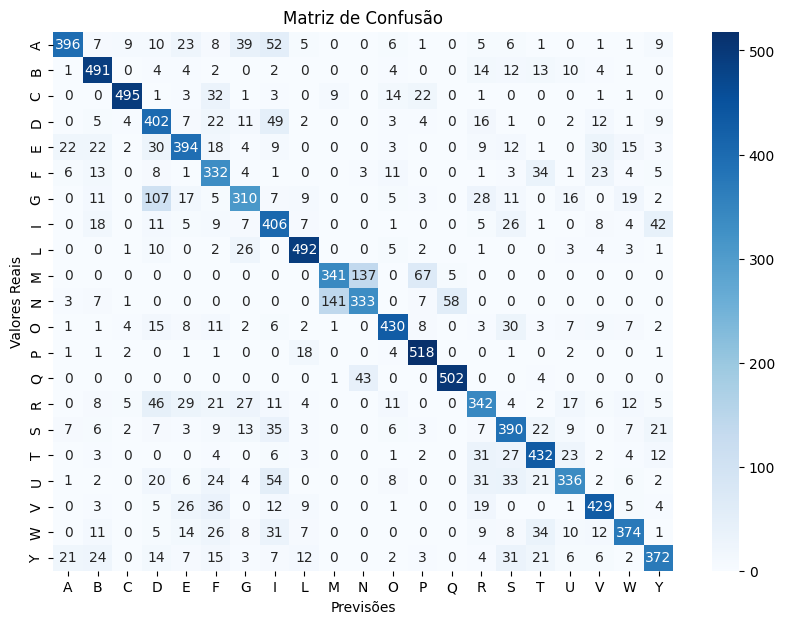

In [ ]:
import seaborn as sns

letras = ["A", "B", "C", "D", "E", "F", "G", "I", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "Y"]

# Gerar a matriz de confusão
matriz_confusao = confusion_matrix(y_teste, previsoes_teste)
print("Matriz de confusão:\n", matriz_confusao)

# Visualizar matriz de confusão

plt.figure(figsize=(10, 7))
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues', xticklabels=letras, yticklabels=letras)
plt.title('Matriz de Confusão')
plt.xlabel('Previsões')
plt.ylabel('Valores Reais')
plt.show()

In [ ]:
# Gerar o relatório de classificação
relatorio = classification_report(y_validacao, previsoes_validacao, target_names=letras)
print(relatorio)

In [ ]:
# Gerar o relatório de classificação
relatorio = classification_report(y_teste, previsoes_teste, target_names=letras)
print(relatorio)

              precision    recall  f1-score   support

           A       0.86      0.68      0.76       579
           B       0.78      0.87      0.82       562
           C       0.94      0.85      0.89       583
           D       0.58      0.73      0.65       550
           E       0.72      0.69      0.70       574
           F       0.58      0.74      0.65       450
           G       0.68      0.56      0.61       550
           I       0.59      0.74      0.65       550
           L       0.86      0.89      0.88       550
           M       0.69      0.62      0.65       550
           N       0.65      0.61      0.62       550
           O       0.83      0.78      0.81       550
           P       0.81      0.94      0.87       550
           Q       0.89      0.91      0.90       550
           R       0.65      0.62      0.64       550
           S       0.66      0.71      0.68       550
           T       0.73      0.79      0.76       550
           U       0.76    

In [ ]:
from sklearn.model_selection import GridSearchCV

#Define os hiperparâmetros para a busca
parametros = {
    'criterion': ['entropy'],
    'max_depth': [ 10, 40],
    'min_samples_split': [10],
    'min_samples_leaf': [50]
}

#Inicializa o modelo de árvore de decisão
modelo_arvore = DecisionTreeClassifier(random_state=42)

#Configura o GridSearchCV
grid_search = GridSearchCV(
    estimator=modelo_arvore,
    param_grid=parametros,
    cv=2,  # Número de divisões para validação cruzada
    scoring='accuracy',  # Métrica para avaliar os modelos
    n_jobs=-1  # Utilizar todos os núcleos disponíveis
)

#Realiza o fit do GridSearchCV
grid_search.fit(x_treino, y_treino)

c:\Users\pitel\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=2, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [10, 40],
                         'min_samples_leaf': [50], 'min_samples_split': [10]},
             scoring='accuracy')

In [ ]:
#Melhor conjunto de parâmetros
print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)

#Melhor modelo encontrado
melhormodelo = grid_search.best_estimator_

#Avalia o melhor modelo no conjunto de teste
previsoes_melhor = melhormodelo.predict(x_teste)
acuracia_melhor = accuracy_score(y_teste, previsoes_melhor)

print(f"Acurácia do melhor modelo no conjunto de teste: {acuracia_melhor}")

Melhores parâmetros encontrados:
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 10}
Acurácia do melhor modelo no conjunto de teste: 0.8510730231888233


Matriz de confusão:
 [[273   0   0   7  13   5   5   0   0   0   0   5   0   0   0  10   2   1
    4   1   2]
 [  1 290   3   7   9   0   2   0   6   0   0   1   0   0   5   5   8   5
    0   0   0]
 [  0   0 319   3   0   2   0   3   0   0   1  11   3   0   0   2   0   0
    4   1   0]
 [  1   4   0 270   5  11   9   2   4   0   0   0   0   0  10   0   0   1
    1   1   8]
 [  5   6   0  17 296   3   4   3   0   0   0   2   0   0   0   1   0   3
    0   0   0]
 [  0   9   2   4   3 281  12   6   2   0   0   4   0   0   0   2   0   2
    4   8   1]
 [ 14   5   0   7   5   3 270  10   0   0   0   0   0   0   1   8   0   4
    0   3   8]
 [  1  11   1   3   1   5   9 266   2   0   0   1   0   0   4   3   4   2
    1   4   2]
 [  4   0   5   4   2   2   7  15 309   0   0   3   1   0   1   0   0   0
    1   0   0]
 [  0   0   0   0   0   0   2   0   0 292  11   0   0   6   0   0   0   0
    0   1   0]
 [  0   0   6   0   0   0   0   0   0  13 281   0   0  19   0   0   0   0
    0   0   0]


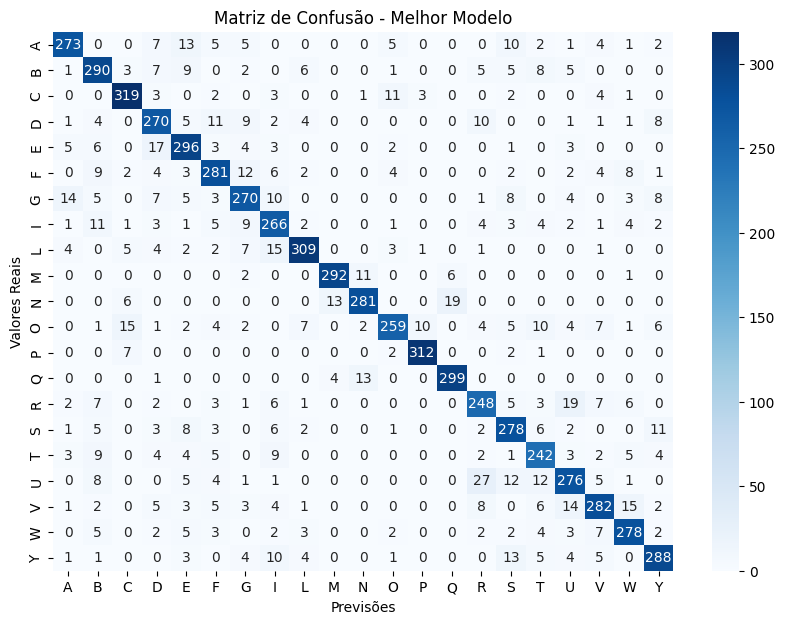

In [ ]:
#Matriz de confusão e relatório de classificação do melhor modelo
matriz_confusao_melhor = confusion_matrix(y_teste, previsoes_melhor)
print("Matriz de confusão:\n", matriz_confusao_melhor)

relatorio_melhor = classification_report(y_teste, previsoes_melhor, target_names=letras)
print(relatorio_melhor)

#Visualiza a matriz de confusão do melhor modelo
plt.figure(figsize=(10, 7))
sns.heatmap(matriz_confusao_melhor, annot=True, fmt='d', cmap='Blues', xticklabels=letras, yticklabels=letras)
plt.title('Matriz de Confusão - Melhor Modelo')
plt.xlabel('Previsões')
plt.ylabel('Valores Reais')
plt.show()